@Author: Dev Bharti
Prior understanding of FastAI tabular model is necessary. Refer to their video 4 for more information (https://course.fast.ai/videos/?lesson=4)

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.tabular import *


Bad key "text.kerning_factor" on line 4 in
/home/dev/anaconda3/envs/deep_ai/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Create the dataframe from CSV and remove unnecessary columns

In [7]:
df_orig = pd.read_csv('OUTPUT_WBI_exposer_cyclones_v14.csv', sep = ';')

In [20]:
df_orig.head(2).T

,0,1
SID,1949163N07145,1950241N23140
NAME,DELLA,JANE
ISO,JPN,JPN
YEAR,1949,1950
COORDS,"[(21.5, 125.424), (22.2, 125.8), (22.9089, 126...","[(23.8845, 139.74), (23.9335, 139.639), (23.98..."
COORDS_MAX_WINDS,"[(27.6584, 128.82), (28.9141, 129.572999999999...","[(28.7509, 133.748), (29.1201, 133.762), (29.6..."
COORDS_MIN_DIST2LAND,"[(31.9866, 130.683), (33.5183, 130.97299999999...","[(34.9374, 135.476), (36.1016, 136.095), (37.2..."
BASIN,WP,WP
SUB BASIN,WP,WP
MONTH_START,6,8


In [13]:
df_orig_del_columns = df_orig.drop(['SID', 'ISO', 'YEAR', 'COORDS',
                 '34KN_POP', '34KN_ASSETS', '64KN_POP', '64KN_ASSETS', '96KN_POP', '96KN_ASSETS'], 
                 axis = 1)

In [14]:
train_df = df_orig_del_columns[:790]
test_df = df_orig_del_columns[790:]

In [15]:
len(df_orig_del_columns), len(train_df), len(test_df)

(991, 790, 201)

In [17]:
# Adding month per Vamsi's code in SVM folder
# train_df['Month'] = train_df.ISO_TIME.apply(lambda x: x[7:9]).astype(int)
# test_df['Month'] = train_df.ISO_TIME.apply(lambda x: x[7:9]).astype(int)

In [18]:
# train_df['Month'].unique()

In [217]:
# # Using Xavier's CPI logic...
# train_df["TOTAL_DAMAGE_(000$)_Adjusted"]= train_df["TOTAL_DAMAGE_(000$)"] / train_df["CPI"]
# train_df["TOTAL_DAMAGE_(000$)_Adjusted"]= train_df["TOTAL_DAMAGE_(000$)_Adjusted"].replace(0, np.nan)
# train_df = train_df.drop(["TOTAL_DAMAGE_(000$)",'CPI'], axis=1)
# df["TOTAL_DAMAGE_(000$)_Adjusted"].isna().sum()

In [218]:
# len(df_mod)/16

In [30]:
test_df.isna().sum()

NAME                                                   0
COORDS_MAX_WINDS                                       0
COORDS_MIN_DIST2LAND                                   0
BASIN                                                  0
SUB BASIN                                              0
MONTH_START                                            0
MONTH_END                                              0
DATE_START                                             0
DATE_END                                               0
DATE_LAND_START                                        0
DATE_LAND_END                                          0
TOTAL_HOURS_EVENT                                      0
TOTAL_HOURS_IN_LAND                                    0
NATURE                                                 0
GENERAL_CATEGORY                                       0
MAX_WIND                                               0
MIN_PRES                                               0
MIN_DIST2LAND                  

# Prepare the categorical variables and continous variables to be passed to the Tabular Model

In [34]:
dep_var = 'TOTAL_AFFECTED'

cat_names = ['BASIN', 
             'SUB BASIN', 
             'MONTH_START', 
             'Income_level_Final', 
             'MAX_USA_SSHS_INLAND',
             'GENERAL_CATEGORY']

cont_names = ['TOTAL_HOURS_IN_LAND',
              'MAX_WIND', 
              'MIN_PRES', 
#               'MAX_STORMSPEED',
              'TOTAL_DEATHS',
              'POP_DEN_SQ_KM',
              'RURAL_POP(%)',
              'V_LAND_KN',
#               'Arable land (hectares per person)',
              'GDP per capita (constant 2010 US$)',
              'POP_MAX_34_ADJ',
              'POP_MAX_50_ADJ',
              'POP_MAX_64_ADJ']

# cont_names_new = ['TOTAL_HRS',
#               'PRES_CALC_MEAN', 
#               'STORM_SPD_MEAN', 
#               'STORM_DR_MEAN',
#               'V_LAND_KN']

#Features not used:
# WIND_CALC_MEAN
# 34KN_POP
# 34KN_ASSETS
# 64KN_POP
# 64KN_ASSETS
# 96KN_POP
# 96KN_ASSETS
# Net flows from UN agencies US$
# pop_max_34                                              
# pop_max_50                                              
# pop_max_64                                              
# pop_max_34_adj                                          
# pop_max_50_adj                                          
# pop_max_64_adj 
# Total Deaths

In [35]:
#FillMissing populates the NA values with Medians. Categorify converts categorical variables 
# into category data types and Normalise normalises the continous variables.
procs=[FillMissing, Categorify, Normalize]

In [36]:
#Helper function to generate a DataBunch from a dataframe, taking into account parameters
#log = True enables logs to be used for target variable (Total Affected)
data = (TabularList.from_df(train_df, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                .split_by_rand_pct(0.25)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                .add_test(TabularList.from_df(test_df, path='.', cat_names=cat_names, cont_names=cont_names))
                .databunch())

# data_new = (TabularList.from_df(df_mod_new, path='.', cat_names=cat_names, cont_names=cont_names_new, procs=procs)
#                 .split_by_rand_pct()
#                 .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
#                 .databunch())

In [37]:
len(data.train_ds), len(data.valid_ds), len(data.test_ds)

(593, 197, 201)

In [38]:
# data_new.show_batch(10)

# Build the model

In [107]:
#Provides an upperbound for target variable
# max_log_y = np.log(np.max(df_mod[dep_var])*1.2)
# y_range = torch.tensor([0, max_log_y], device=defaults.device)

# max_log_y = np.log(1.2) + np.max(df_mod[dep_var])
# y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [68]:
# creates a learner with embeddings
learn = tabular_learner(data, 
                        layers=[1000, 800, 500, 300], 
                        loss_func = MSELossFlat(),
#                         y_range = y_range, 
                        metrics= [mae, msle, rmse, exp_rmspe], 
                        ps=[0.4, 0.3, 0.2, 0.1], 
                        emb_drop=0.03)
#                         callback_fns=ShowGraph)

In [69]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(7, 5)
    (1): Embedding(13, 7)
    (2): Embedding(13, 7)
    (3): Embedding(5, 4)
    (4): Embedding(14, 7)
    (5): Embedding(8, 5)
    (6): Embedding(3, 3)
    (7): Embedding(3, 3)
    (8): Embedding(3, 3)
    (9): Embedding(3, 3)
    (10): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.03, inplace=False)
  (bn_cont): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=61, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=1000, out_features=800, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(800, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=800, out_features=500, bias=True)
    (9): ReLU(i

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


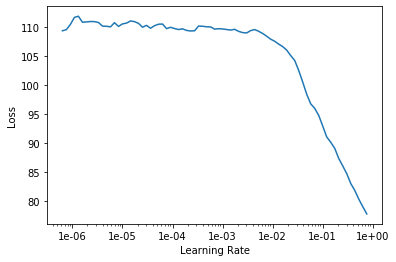

In [70]:
learn.lr_find()
learn.recorder.plot()

In [71]:
# learn.fit_one_cycle(10, slice(1e-2, 1e-1), wd=0.1)
learn.fit(10, (1e-01)/2, wd = 0.1)

epoch,train_loss,valid_loss,mean_absolute_error,mean_squared_logarithmic_error,root_mean_squared_error,exp_rmspe,time
0,70.760071,121.862122,8.439988,nan,10.991033,370363039744.000000,00:00
1,41.471184,21.584572,3.963320,0.223086,4.624774,3988.094238,00:00
2,30.025032,11.644509,2.687811,0.163829,3.400974,2671.527832,00:00
3,23.341146,9.891524,2.438227,0.138225,3.133082,3342.631348,00:00
4,18.796785,9.260242,2.450502,0.127512,3.033599,1204.512329,00:00
5,15.690874,8.510782,2.350226,0.124281,2.910508,1010.948853,00:00
6,13.583328,8.408577,2.329426,0.123783,2.886547,1250.642334,00:00
7,11.875087,9.553779,2.396278,0.133952,3.078767,4099.686035,00:00
8,10.557923,9.069807,2.396032,0.132041,3.001875,1462.414185,00:00
9,9.536117,8.216430,2.307680,0.119060,2.861103,1244.255737,00:00


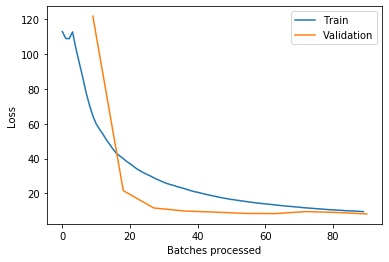

In [72]:
learn.recorder.plot_losses()

In [119]:
#Trying out predictions

In [118]:
test_preds, _ = learn.get_preds(DatasetType.Test)
# np.exp(test_preds[0].item()), np.exp(test_preds[1].item()), np.exp(test_preds[2].item()), np.exp(test_preds[3].item())
test_preds[:3]

tensor([[10.2957],
        [11.6667],
        [ 7.0771]])

In [116]:
test_df[dep_var].values[:3]

array([ 3596, 21000,    54])

In [102]:
test_preds[0].item(), test_preds[1].item(), test_preds[2].item(), test_preds[3].item()

(10.295740127563477, 11.666696548461914, 7.077078819274902, 12.99042797088623)

In [101]:
np.log(test_df[dep_var].values[0]), test_df[dep_var].values[1], test_df[dep_var].values[2], test_df[dep_var].values[3]

(8.18757739559151, 21000, 54, 390150)

In [109]:
learn.predict(test_df[0])

KeyError: 0

In [278]:
# np.exp(test_preds).squeeze().shape
# test_df[dep_var].values
# a = torch.from_numpy(test_df[dep_var].values)
# a.shape

In [279]:
# accuracy(np.exp(test_preds).squeeze(), a)